In [1]:
# B1: Load data vào data loader
# B2: so sánh sự tương quan giữa các data
# B3: có thể lập mô hình hồi quy, phân loại, dự đoán hay gì đó

In [2]:
import pandas as pd
data_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
data_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/california_housing_train.csv'

In [ ]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Lấy thông tin sơ bộ của dataset
info = data_train.info()
# có thể thấy ko có null và có 17000 data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
# hiện các thống kê của từng feature,
stat = data_train.describe()
stat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(data_train.values.T)
cm



array([[ 1.00000000e+00, -9.25208279e-01, -1.14250306e-01,
         4.70104403e-02,  7.18019559e-02,  1.01674265e-01,
         5.96277042e-02, -1.54849614e-02, -4.49816965e-02],
       [-9.25208279e-01,  1.00000000e+00,  1.64539031e-02,
        -3.87725742e-02, -6.93729152e-02, -1.11261361e-01,
        -7.49022967e-02, -8.03030138e-02, -1.44916717e-01],
       [-1.14250306e-01,  1.64539031e-02,  1.00000000e+00,
        -3.60984166e-01, -3.20434083e-01, -2.95889805e-01,
        -3.02754191e-01, -1.15931625e-01,  1.06757707e-01],
       [ 4.70104403e-02, -3.87725742e-02, -3.60984166e-01,
         1.00000000e+00,  9.28402988e-01,  8.60170341e-01,
         9.19018298e-01,  1.95382807e-01,  1.30991466e-01],
       [ 7.18019559e-02, -6.93729152e-02, -3.20434083e-01,
         9.28402988e-01,  1.00000000e+00,  8.81168574e-01,
         9.80920092e-01, -1.34946823e-02,  4.57830520e-02],
       [ 1.01674265e-01, -1.11261361e-01, -2.95889805e-01,
         8.60170341e-01,  8.81168574e-01,  1.000000

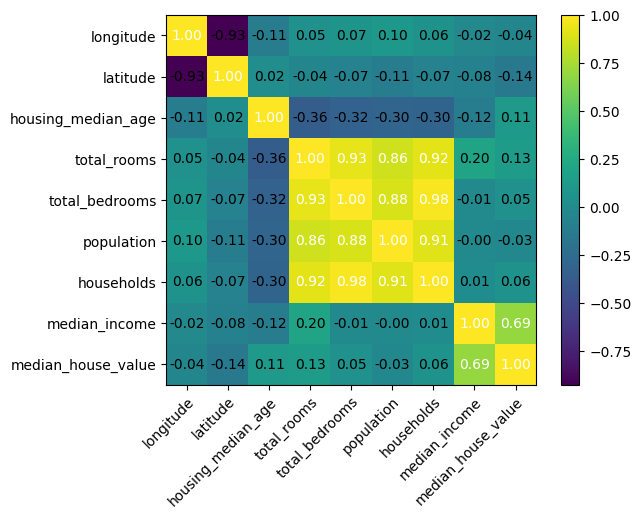

In [ ]:
heat_map = heatmap(cm, row_names = data_train.columns, column_names = data_train.columns)

In [ ]:
# có thể thấy là cái lognitude và latitude có mối quan hệ ngược, tuy nhiên điều này có vẻ không dùng được thì nó là tọa độ của Califonia
# ta thấy có sự tương quan giữa : "total_rooms - total_bed_rooms", " total_rooms - population", "total_rooms - households", ......, nói chung cả 4 thằng này đều có mối liên hệ tương quan với nhau.
# bên cạnh đó thì mean_house values và medina_imcome cũng có mối liên hệ tương quan - hợp lí

In [ ]:
select_data_train = data_train[['population','households']]
select_data_train

,population,households
0,1015.0,472.0
1,1129.0,463.0
2,333.0,117.0
3,515.0,226.0
4,624.0,262.0
...,...,...
16995,907.0,369.0
16996,1194.0,465.0
16997,1244.0,456.0
16998,1298.0,478.0


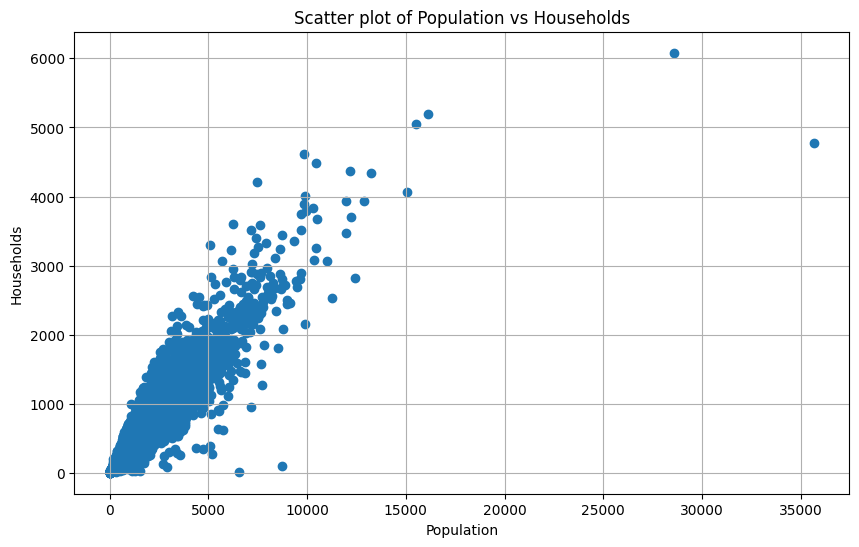

In [ ]:
# Create a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(select_data_train['population'], select_data_train['households'])
plt.xlabel('Population')
plt.ylabel('Households')
plt.title('Scatter plot of Population vs Households')
plt.grid(True)
plt.show()

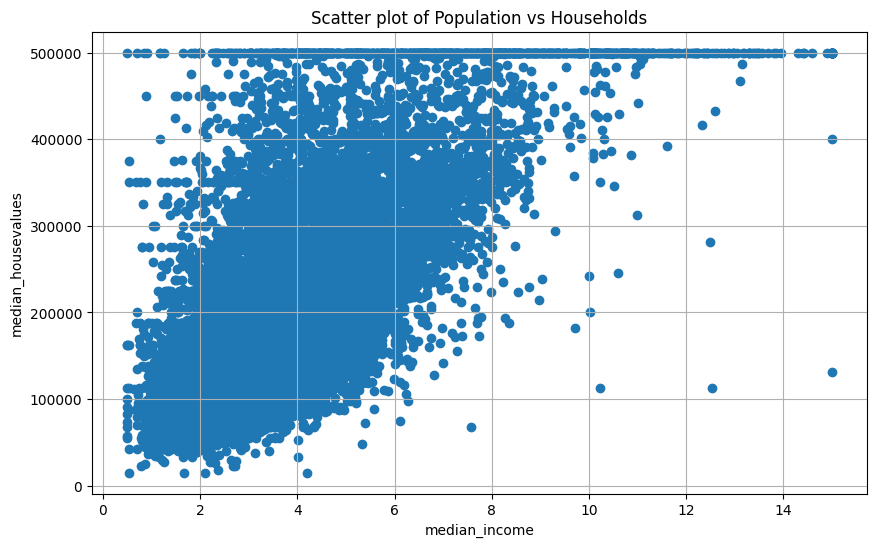

In [ ]:
select_data_train_money = data_train[['median_income','median_house_value']]
select_data_train_money

#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(select_data_train_money['median_income'], select_data_train_money['median_house_value'])
plt.xlabel('median_income')
plt.ylabel('median_housevalues')
plt.title('Scatter plot of Population vs Households')
plt.grid(True)
plt.show()

Slope [[0.30458975]]
Intercef [65.78837884]


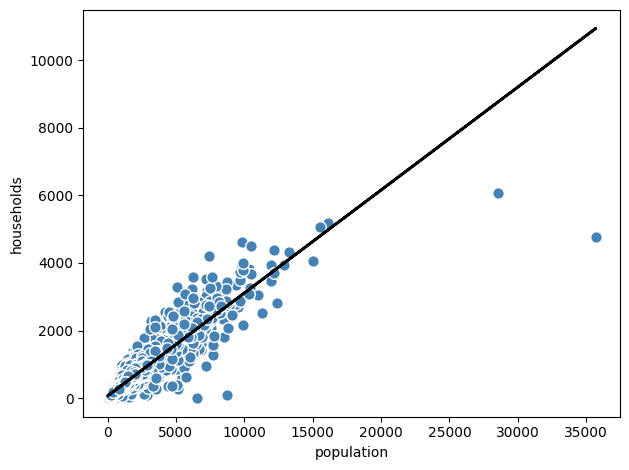

In [ ]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
linear_result = model_linear.fit(select_data_train[['population']].values, select_data_train[['households']].values)
print('Slope',linear_result.coef_)
print('Intercef',linear_result.intercept_)

def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)

lin_regplot(select_data_train[['population']].values, select_data_train[['households']].values, linear_result)
plt.xlabel('population')
plt.ylabel('households')
plt.tight_layout()
plt.show()



In [ ]:
type(linear_result)

sklearn.linear_model._base.LinearRegression

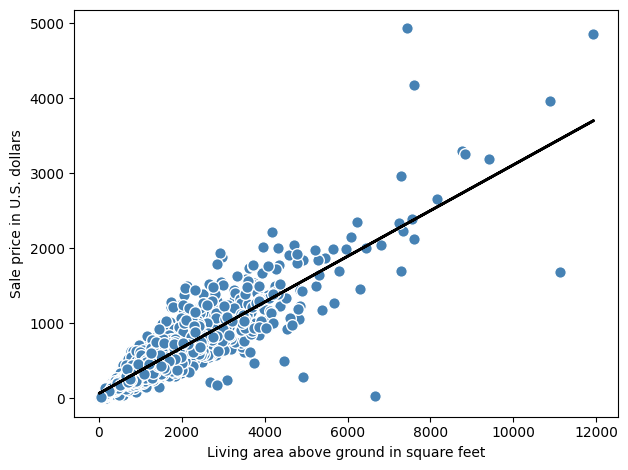

In [ ]:
select_data_test = data_test[['population','households']]

lin_regplot(select_data_test[['population']].values, select_data_test[['households']].values, linear_result)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()

In [ ]:
# Bây giới tới biến đổi hàm
# mình nhớ là sẽ nếu muốn cho nó thành bậc 2 thì chuyển cái đường thẳng thành dạng bậc 2 với 3 tham số, và bộ dataset sẽ chuyển về x^2, x,y

Slope [[ 0.00000000e+00  3.50222374e-01 -5.17810957e-06]]
Intercef [17.95767163]


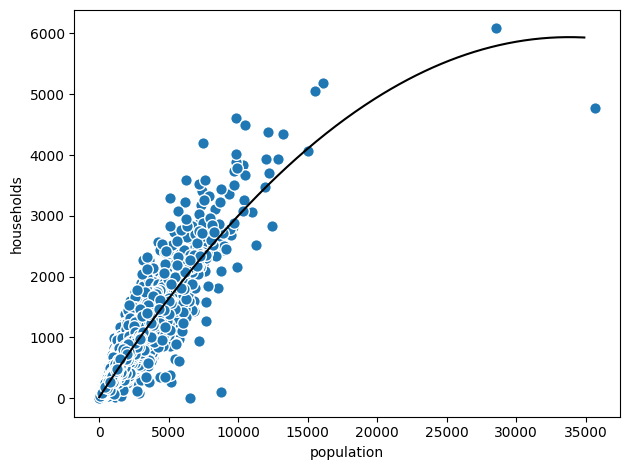

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(select_data_train[['population']].values)


model_linear_ver2 = LinearRegression()
linear_result_ver2 = model_linear.fit(X_quad, select_data_train[['households']].values)
print('Slope',linear_result.coef_)
print('Intercef',linear_result.intercept_)

plt.scatter(select_data_train[['population']].values, select_data_train[['households']].values, edgecolor='white', s=70)

X_fit = np.arange(0, 35000, 100).reshape(-1, 1)
#draw = LinearRegression()
y_pred = linear_result_ver2.predict(quadratic.fit_transform(X_fit))

plt.plot(X_fit, y_pred,label='Quadratic fit', color='black')



plt.xlabel('population')
plt.ylabel('households')
plt.tight_layout()
plt.show()

